In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.9
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.9
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50, 0.9, array([1., 1.]))


VERIFIED FOR THETA=-45,45,135,180,90,30,-30. VERIFIED FOR ECC =0.001, 0.1,0.5, 0.7, 0.9, 0.95 VERIFIED FOR RAD0=50,75 100 

In [5]:
import getxyuvtwoellipse

In [6]:
xyuvaeqellipse=getxyuvtwoellipse.getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.66519143 0.52359878] 0.9 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50
[-43.30127019  43.30127019]
[-25.  25.]
(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [7]:
import RK4implicit

In [8]:
import OrbitDiffEq

In [9]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq.OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0


In [10]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [11]:
import timestep

In [12]:
numsteps=6000*10
dt=0.1
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestep.timestep(numsteps,dt,xyuvaeqellipse,outputevery)

In [13]:
import ellipsefns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import numpy as np
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
#theta0=math.pi/6.
# add a circle renderer with x and y coordinates, size, color, and alpha
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1), line_color="cyan", legend="Ideal Ellipse 2")
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),line_color="black", legend="Ideal Ellipse 1")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(xax, np.tan(theta0)*xax,line_color="green")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

%%html
<a href="https://github.com/sdorsher/ManyBodyProblem/blob/master/EllipseSymmetry.png">Elliptical orbits at thirty degrees with symmetry line</a>
It is clear that the elliptical orbits have focuses, perhelions, and aphelions on the axis of symmetry from this plot. It is also clear that the orbits are symmetric with respect to eachother. 

# Conservation of angular momentum

In [14]:
import Lstability

In [15]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(6.137874688657065e-14, -1.0274023338281324)

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [16]:
import Estability

In [17]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(2.993179159919564e-12, -0.005000000000005491)

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [18]:
import orbitSymmetricTol

In [19]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [20]:
allcancelsx

5.682362056969522e-11

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [21]:
allcancelsa

1e-14

In [22]:
npstar1x

array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [-8.22716021e+01, -4.75014048e+01,  0.00000000e+00,
         8.11347001e-03, -1.40474021e-02,  0.00000000e+00],
       [-8.22707907e+01, -4.75028095e+01,  0.00000000e+00,
         8.11586893e-03, -1.40460170e-02,  0.00000000e+00],
       ...,
       [-3.88013742e+01, -4.68303080e+01,  0.00000000e+00,
         5.19155069e-02,  2.29403132e-02,  0.00000000e+00],
       [-3.87961824e+01, -4.68280137e+01,  0.00000000e+00,
         5.19198196e-02,  2.29455186e-02,  0.00000000e+00],
       [-3.87909902e+01, -4.68257189e+01,  0.00000000e+00,
         5.19241329e-02,  2.29507250e-02,  0.00000000e+00]])

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [23]:
import aeTest

In [24]:
perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

aphelion [-82.27308599299724, -47.498834773686085]
perihelion [4.336510383112835, 2.488926492036438]
r_ap 94.99999991404762
r_per 5.000007738554635
a 50.000003826301125
e 0.899999852881521
delta a 7.652602249663686e-08
delta e 1.634649767397652e-07
perhelion index 22214
aphelion index 44428


Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

# Testing for symmetry within a given star's orbit about the line created by the initial angle with the origin that should pass thorugh the center of the ellipse, both focuses, and perihelion and aphelion

In [25]:
tosum1=list(range(0,perindex+1))
tosum2=list(range(perindex+1,apindex+1))

In [26]:
len(tosum1)

22215

In [27]:
len(tosum2)

22214

In [28]:
revtosum2=tosum2.reverse()

In [29]:
xsum=np.zeros(perindex+1)
ysum=np.zeros(perindex+1)
for index in np.arange(0,perindex+1):
    xsum[index]=npstar1x[index,0]+npstar1x[apindex+1-index,0]
    ysum[index]=npstar1x[index,1]+npstar1x[apindex+1-index,1]

In [30]:
xsum=xsum/2

In [31]:
ysum=ysum/2

In [32]:
import matplotlib.pyplot as plt
plt.plot(xsum,ysum,label="Sum of data")
plt.plot(xsum,np.tan(theta0)*xsum, color="green", label="Line defining perhelion")
plt.xlabel("Symmetric X sum")
plt.ylabel("Symmetric Y sum")
plt.legend()
plt.title("Sum of data reflection about perhelion")
plt.show()

<Figure size 640x480 with 1 Axes>

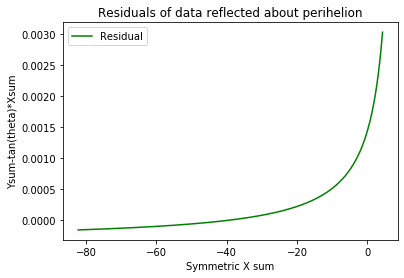

In [33]:
plt.plot(xsum,ysum-np.tan(theta0)*xsum, color="green", label="Residual")
plt.xlabel("Symmetric X sum")
plt.ylabel("Ysum-tan(theta)*Xsum")
plt.title("Residuals of data reflected about perihelion")
plt.legend()
plt.show()

The residual improves substantially from .2 at perihelion with a timestep of dt=1 to .125 at perihelion with a timestep of dt=.3 to .02 at perihelion with a timestep of dt=.1. I think timestep makes all the difference between adjacent pairs of points in resolving perihelion. I think it is difficult to tell how symmetric the orbit is by this method when the limitation is in the resolution of the orbit with timestep. Interpolation would be necessary to get a good picture of orbital shape. 

In the interest of accomplishing further orbital evolutions, I think I'm going to let the precice numerical characterization of orbital shape question go (the predicted and actual orbits overlap quite nicely) and move on to evolving parabolic and hyperbolic orbits. 

In [34]:
nptimes

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 5.9997e+03, 5.9998e+03,
       5.9999e+03])

In [35]:
from scipy.optimize import curve_fit

In [36]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [37]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [52]:
def parametricEllipsex(t,theta,ecc,rad):
    focus=getfocus(rad,ecc)
    b=getsemiminor(rad,ecc)
    #theta0=math.pi/6.
    xdim=rad
    ydim=b
    star1x=ellipsefns.getxtheory(theta,ecc,rad,t,-1)
    print(t,ecc, rad, theta)
    print(focus,b)
    star1y=ellipsefns.getytheory(theta,ecc,rad,t,-1)
    #print(theta,ecc,rad)
    #star1x=focus*np.cos(theta)+xdim*np.cos(t)*np.cos(theta)-ydim*np.sin(t)*np.sin(theta)
    #star1y=focus*np.sin(theta)+ydim*np.cos(theta)*np.sin(t)+xdim*np.sin(theta)*np.cos(t)
    return star1x

In [53]:
def parametricEllipsey(t,theta,ecc,rad):
    focus=getfocus(rad,ecc)
    b=getsemiminor(rad,ecc)
    #theta0=math.pi/6.
    xdim=rad
    ydim=b
    star1x=ellipsefns.getxtheory(theta,ecc,rad,t,-1)
    star1y=ellipsefns.getytheory(theta,ecc,rad,t,-1)
    #star1x=focus*np.cos(theta)+xdim*np.cos(t)*np.cos(theta)-ydim*np.sin(t)*np.sin(theta)
    #star1y=focus*np.sin(theta)+ydim*np.cos(theta)*np.sin(t)+xdim*np.sin(theta)*np.cos(t)
    return star1y

In [63]:
testinitialdat=parametricEllipsex(nptimes,theta0,ecc0,rad0)

[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] 0.9 50 0.5235987755982988
45.0 21.79449471770337


In [64]:
testinitialdat

array([4.33012702, 3.02589159, 1.30203568, ..., 0.31165829, 2.23463294,
       3.74589309])

In [65]:
npstar1x[:,0]

array([-82.27241336, -82.27160213, -82.27079067, ..., -38.80137418,
       -38.79618242, -38.79099022])

theoretical curve begins at perihelion. we need it to begin at aphelion

In [54]:
-2.30794263/math.pi*180

-132.23537205732333

In [55]:
-180-_

-47.76462794267667

In [56]:
theta0

0.5235987755982988

In [57]:
theta0/math.pi*180

30.0

In [58]:
from lmfit import Minimizer, Parameters, report_fit

In [59]:
def residualx(pars, t, npstar1x):
    fitval=parametricEllipsex(t,pars['theta'], pars['eccentricity'], pars['semimajoraxis'])
    residual = npstar1x[:,0]-fitval
    print(t, npstar1x[:,0], fitval, residual)
    return npstar1x[:,0]-parametricEllipsex(t,pars['theta'], pars['eccentricity'], pars['semimajoraxis'])
    

In [60]:
def residualy(pars, t, npstar1x):
    return npstar1x[:,1]-parametricEllipsey(t,pars['theta'], pars['eccentricity'], pars['semimajoraxis'])
    

In [61]:
def residualxy(pars, t, npstarx1):
    fitvalx=parametricEllipsex(t,pars['theta'], pars['eccentricity'], pars['semimajoraxis'])
    fitvaly=parametricEllipsey(t,pars['theta'], pars['eccentricity'], pars['semimajoraxis'])
    residual = npstar1x[:,0:2]-np.array([fitvalx,fitvaly]).transpose()
    return residual

In [62]:
pfit = Parameters()
pfit.add(name='theta', value=theta0, min=0, max=2.*math.pi, vary=True)
pfit.add(name='semimajoraxis', value=rad0, min=0, vary=True)
pfit.add(name='eccentricity', value=ecc0, min=0, max=1.0, vary=True)

minix = Minimizer(residualx, pfit, fcn_args=(nptimes,npstar1x))
miniy = Minimizer(residualy, pfit, fcn_args=(nptimes,npstar1x))
minall= Minimizer(residualxy, pfit, fcn_args=(nptimes, npstar1x))
outx = minix.leastsq()
outy=miniy.leastsq()
outxy=minall.leastsq()

[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=50.0, bounds=[0:inf]> <Parameter 'theta', value=0.5235987755982987, bounds=[0:6.283185307179586]>
45.0 21.79449471770337
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] [-82.27241336 -82.27160213 -82.27079067 ... -38.80137418 -38.79618242
 -38.79099022] [4.33012702 3.02589159 1.30203568 ... 0.31165829 2.23463294 3.74589309] [-86.60254038 -85.29749373 -83.57282635 ... -39.11303248 -41.03081535
 -42.53688331]
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=50.0, bounds=[0:inf]> <Parameter 'theta', value=0.5235987755982987, bounds=[0:6.283185307179586]>
45.0 21.79449471770337
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9, bounds=[0:1.0]

[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] [-82.27241336 -82.27160213 -82.27079067 ... -38.80137418 -38.79618242
 -38.79099022] [ 7.31416066e-06 -2.02757894e-01 -8.05941730e-01 ... -1.05770320e+01
 -8.00933732e+00 -5.76406054e+00] [-82.27242067 -82.06884424 -81.46484894 ... -28.22434221 -30.7868451
 -33.02692968]
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9999998184081054, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=47.749169949689275, bounds=[0:inf]> <Parameter 'theta', value=0.5669680191244488, bounds=[0:6.283185307179586]>
47.74916127882704 0.028775907868523024
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9999998760856506, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=47.76681845127819, bounds=[0:inf]> <Parameter 'theta', value=0.567566951860645, bounds=[0:6.283185307179586]>
47.76681253228396 0.023779466159773523
[0.000

[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9998721027048001, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=47.48797713876201, bounds=[0:inf]> <Parameter 'theta', value=0.5661567468017927, bounds=[0:6.283185307179586]>
47.48190355493145 0.7594784603739065
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9998721027048001, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=47.48797713876201, bounds=[0:inf]> <Parameter 'theta', value=0.5661567725658594, bounds=[0:6.283185307179586]>
47.48190355493145 0.7594784603739065
[0.0000e+00 1.0000e-01 2.0000e-01 ... 5.9997e+03 5.9998e+03 5.9999e+03] <Parameter 'eccentricity', value=0.9998721027048001, bounds=[0:1.0]> <Parameter 'semimajoraxis', value=47.48797786098186, bounds=[0:inf]> <Parameter 'theta', value=0.5661567468017927, bounds=[0:6.283185307179586]>
47.48190427705892 0.7594784719243377
[0.0000e+00 1.0000e-01 2.0000e-

In [49]:
outx

In [50]:
outy

In [51]:
outxy

it does not appear to be very elliptical. This is a terrible reduced chi squared, absolutely awful, and the relative error on the values is quite high. However, except for eccentricity, the values recovered are nearly reasonable. I notice from the printed output that the first data point for x at computed aphelion is not the same as the theoretical value. This is perhaps the source of part of the problem. I should begin my investigations there. 